## Advanced Business Analytics

In [16]:
# Import of necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import os
import plotly.express as px
import pandas as pd
import squarify

In [17]:
# get the working directory
os.getcwd()

'c:\\Users\\Andrzej\\Desktop\\Semester 3\\ABA\\project_2'

In [18]:
# Import the data and have a look on it
data = pd.read_csv('mtpl.csv', sep = ';')
data = data.drop('Unnamed: 0', axis = 1) #CZY WSPOMINAĆ O TYM???
data.head(10)

,PolicyID,NumClaims,Exposure,PowerClass,CarAge,DriverAge,CarMakeGroup,Fuel,Region,CityPopDensity,ClaimAmount
0,1,0,"0,09",g,0,46,Japanese_or_Korean_excl_Nissan,Diesel,Aquitaine,76,NaN
1,2,0,"0,84",g,0,46,Japanese_or_Korean_excl_Nissan,Diesel,Aquitaine,76,NaN
2,3,0,"0,52",f,2,38,Japanese_or_Korean_excl_Nissan,Regular,Nord-Pas-de-Calais,3003,NaN
3,4,0,"0,45",f,2,38,Japanese_or_Korean_excl_Nissan,Regular,Nord-Pas-de-Calais,3003,NaN
4,5,0,"0,15",g,0,41,Japanese_or_Korean_excl_Nissan,Diesel,Pays-de-la-Loire,60,NaN
5,6,0,"0,75",g,0,41,Japanese_or_Korean_excl_Nissan,Diesel,Pays-de-la-Loire,60,NaN
6,7,0,"0,81",d,1,27,Japanese_or_Korean_excl_Nissan,Regular,Aquitaine,695,NaN
7,8,0,"0,05",d,0,27,Japanese_or_Korean_excl_Nissan,Regular,Aquitaine,695,NaN
8,9,0,"0,76",d,9,23,Fiat,Regular,Nord-Pas-de-Calais,7887,NaN
9,10,0,"0,34",i,0,44,Japanese_or_Korean_excl_Nissan,Regular,Ile-de-France,27000,NaN


In [19]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 413960
Number of columns: 11


In [20]:
# All the data has been checked for suspicious values using unique(), everything seems to be okay
# But there are some duplicates in the data as follows:
duplicates = data.duplicated()
duplicates_no = data.drop("ClaimAmount", axis = 1).duplicated()
print(f"Number of duplicates on all columns: {duplicates.sum()}")
print(f"Number of duplicates on columns except ClaimAmount: {duplicates_no.sum()}")

Number of duplicates on all columns: 1
Number of duplicates on columns except ClaimAmount: 791


In [21]:
# Wiew the duplicated record
data[data.duplicated()]

,PolicyID,NumClaims,Exposure,PowerClass,CarAge,DriverAge,CarMakeGroup,Fuel,Region,CityPopDensity,ClaimAmount
43444,43357,2,1,g,9,32,Renault_Nissan_or_Citroen,Diesel,Pays-de-la-Loire,490,1169.0


In [22]:
# Drop it
data = data.drop_duplicates()

In [23]:
# Checking for null values
data.isnull().sum()

PolicyID               0
NumClaims              0
Exposure               0
PowerClass             0
CarAge                 0
DriverAge              0
CarMakeGroup           0
Fuel                   0
Region                 0
CityPopDensity         0
ClaimAmount       397779
dtype: int64

In [24]:
# It seems that only the dependent variable ClaimAmount has null values which account for 94% 
# of total observations.
print(f"Observations in ClaimAmount that are NA: {(1-round(data.count()[-1]/data.count()[0], 3))*100} %")

Observations in ClaimAmount that are NA: 96.1 %


C:\Users\Andrzej\AppData\Local\Temp\ipykernel_26472\2608355360.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Observations in ClaimAmount that are NA: {(1-round(data.count()[-1]/data.count()[0], 3))*100} %")
C:\Users\Andrzej\AppData\Local\Temp\ipykernel_26472\2608355360.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Observations in ClaimAmount that are NA: {(1-round(data.count()[-1]/data.count()[0], 3))*100} %")


In [25]:
# Filling NA with 0 because they are not actual NA, but no claims regarding the policy were made
data['ClaimAmount'] = data['ClaimAmount'].fillna(0)
data.head(5)

,PolicyID,NumClaims,Exposure,PowerClass,CarAge,DriverAge,CarMakeGroup,Fuel,Region,CityPopDensity,ClaimAmount
0,1,0,"0,09",g,0,46,Japanese_or_Korean_excl_Nissan,Diesel,Aquitaine,76,0.0
1,2,0,"0,84",g,0,46,Japanese_or_Korean_excl_Nissan,Diesel,Aquitaine,76,0.0
2,3,0,"0,52",f,2,38,Japanese_or_Korean_excl_Nissan,Regular,Nord-Pas-de-Calais,3003,0.0
3,4,0,"0,45",f,2,38,Japanese_or_Korean_excl_Nissan,Regular,Nord-Pas-de-Calais,3003,0.0
4,5,0,"0,15",g,0,41,Japanese_or_Korean_excl_Nissan,Diesel,Pays-de-la-Loire,60,0.0


In [26]:
# Get the description of the variables
data.describe()

,PolicyID,NumClaims,CarAge,DriverAge,CityPopDensity,ClaimAmount
count,413959.000000,413959.000000,413959.000000,413959.000000,413959.000000,4.139590e+05
mean,206573.359586,0.043084,7.531432,45.317425,1987.329136,8.325440e+01
std,119275.817412,0.223167,5.761998,14.332689,4779.603517,4.184735e+03
min,1.000000,0.000000,0.000000,18.000000,2.000000,0.000000e+00
25%,103271.500000,0.000000,3.000000,34.000000,67.000000,0.000000e+00
50%,206557.000000,0.000000,7.000000,44.000000,287.000000,0.000000e+00
75%,309888.500000,0.000000,12.000000,54.000000,1410.000000,0.000000e+00
max,413169.000000,4.000000,100.000000,99.000000,27000.000000,2.036833e+06


### Visualizations

In [27]:
data['Exposure'] = pd.to_numeric(data['Exposure'].replace({',': '.'}, regex=True))

In [28]:
data.select_dtypes(include=['number'])

,PolicyID,NumClaims,Exposure,CarAge,DriverAge,CityPopDensity,ClaimAmount
0,1,0,0.090000,0,46,76,0.0
1,2,0,0.840000,0,46,76,0.0
2,3,0,0.520000,2,38,3003,0.0
3,4,0,0.450000,2,38,3003,0.0
4,5,0,0.150000,0,41,60,0.0
...,...,...,...,...,...,...,...
413955,413165,0,0.002740,0,29,2471,0.0
413956,413166,0,0.005479,0,29,5360,0.0
413957,413167,0,0.005479,0,49,5360,0.0
413958,413168,0,0.002740,0,41,9850,0.0


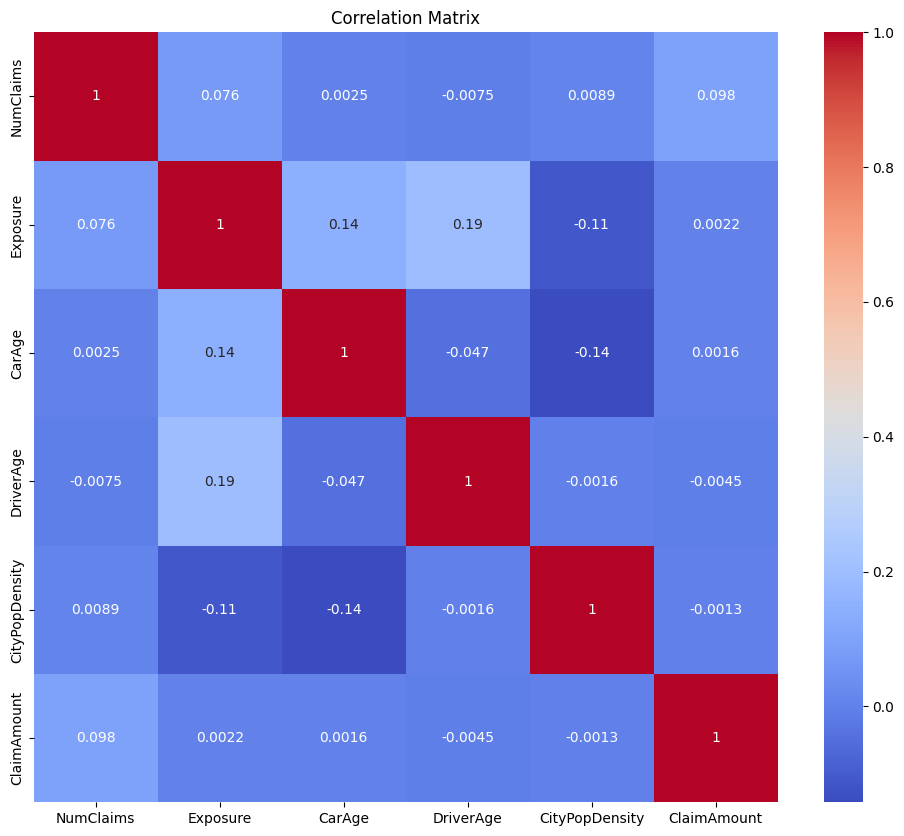

In [29]:
# Correlation matrix
# Select only numeric columns for correlation matrix
selected_features = ['NumClaims', 'Exposure', 'CarAge', 'DriverAge', 'CityPopDensity', 'ClaimAmount']

correlation_matrix = data[selected_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

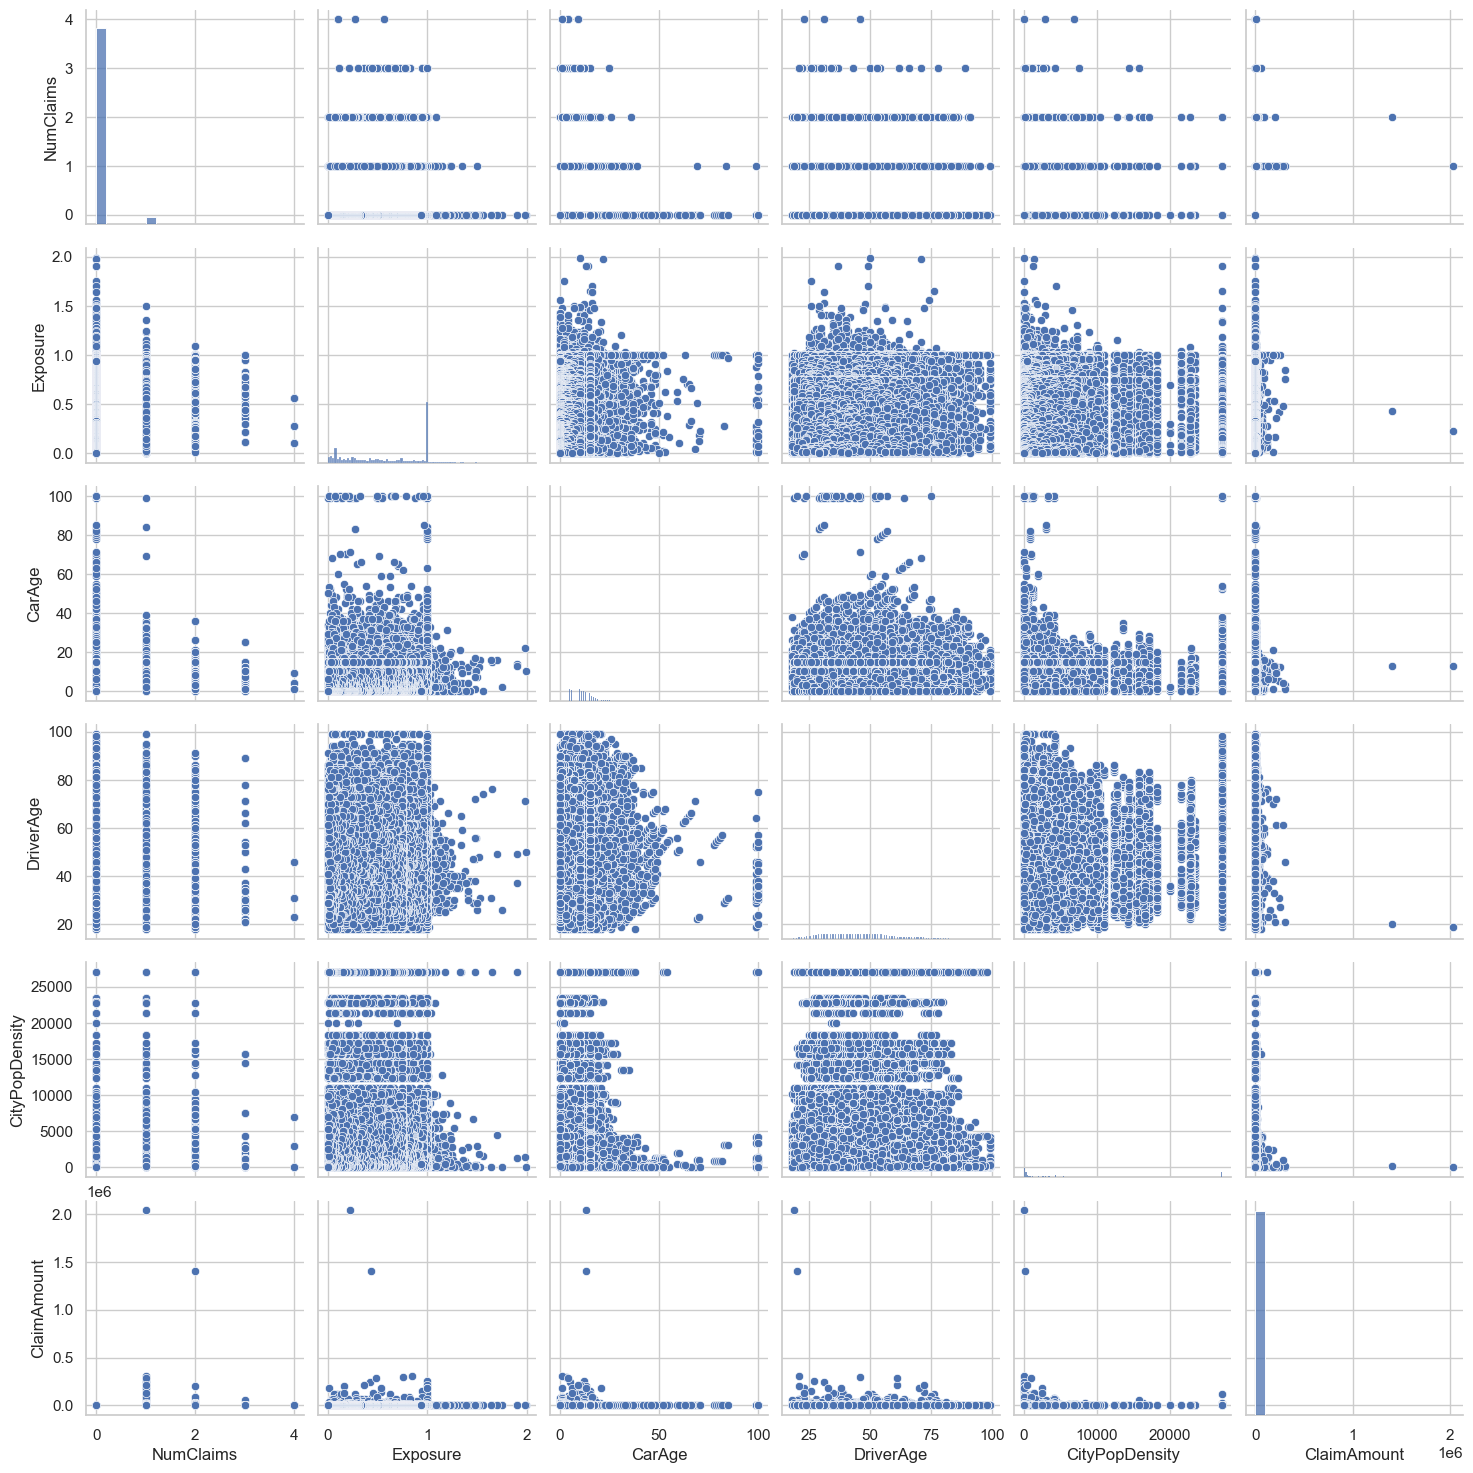

In [30]:
sns.set_theme(style="whitegrid")
sns.pairplot(data[selected_features])
plt.show()

In [31]:
df_vif = add_constant(data[selected_features])
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
print(vif_data)

          feature        VIF
0           const  14.138953
1       NumClaims   1.016459
2        Exposure   1.080441
3          CarAge   1.042894
4       DriverAge   1.045959
5  CityPopDensity   1.030198
6     ClaimAmount   1.009694


In [32]:
# Independent variables are very slightly correlated, which is good; 
# Features with VIF > 5 or 10 indicate potential multicollinearity, but in our case we do not have any

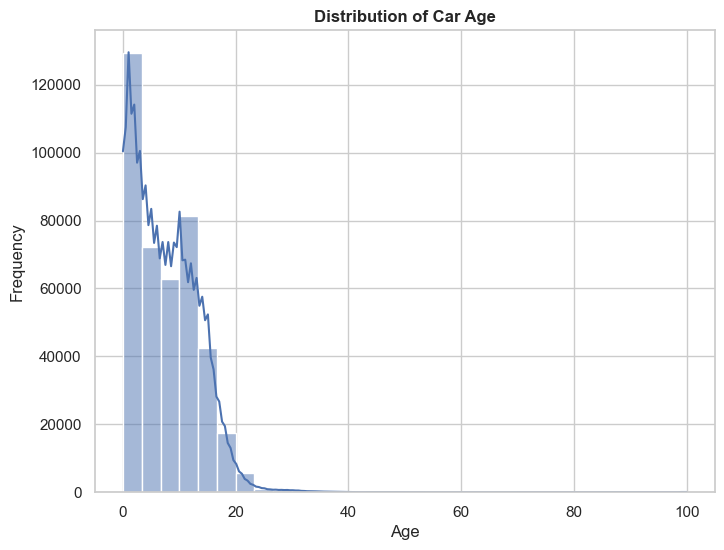

In [33]:
# Histogram of Car Age
plt.figure(figsize=(8, 6))
sns.histplot(data['CarAge'], bins=30, kde=True)
plt.title('Distribution of Car Age', fontweight="bold")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

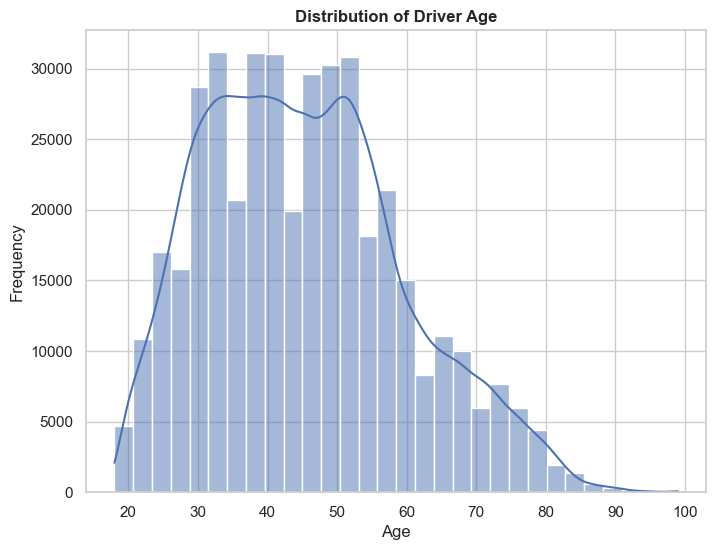

In [34]:
# Histogram of Driver Age
plt.figure(figsize=(8, 6))
sns.histplot(data['DriverAge'], bins=30, kde=True)
plt.title('Distribution of Driver Age', fontweight="bold")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

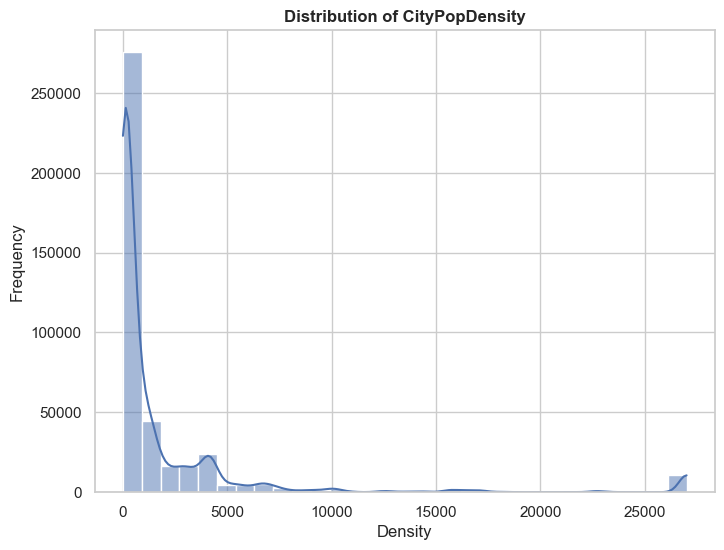

In [35]:
# Histogram of Driver Age
plt.figure(figsize=(8, 6))
sns.histplot(data['CityPopDensity'], bins=30, kde=True)
plt.title('Distribution of CityPopDensity', fontweight="bold")
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.show()

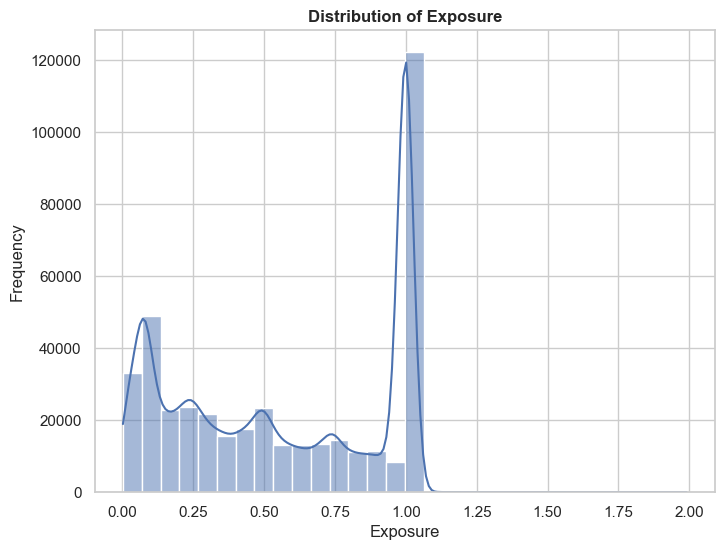

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Exposure'], bins=30, kde=True)
plt.title('Distribution of Exposure', fontweight="bold")
plt.xlabel('Exposure')
plt.ylabel('Frequency')
plt.show()

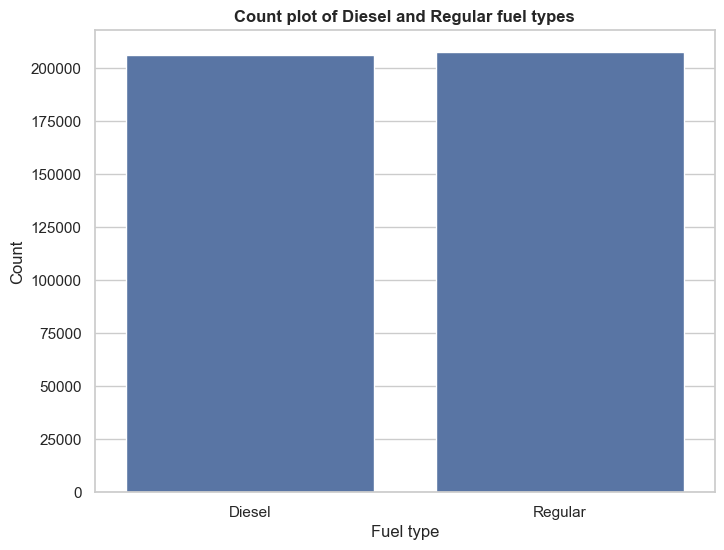

In [37]:
# Count plot: Diesel and Regular fuel types
plt.figure(figsize=(8, 6))
sns.countplot(x='Fuel', data=data)
plt.title('Count plot of Diesel and Regular fuel types', fontweight="bold")
plt.xlabel('Fuel type')
plt.ylabel('Count')
plt.show()

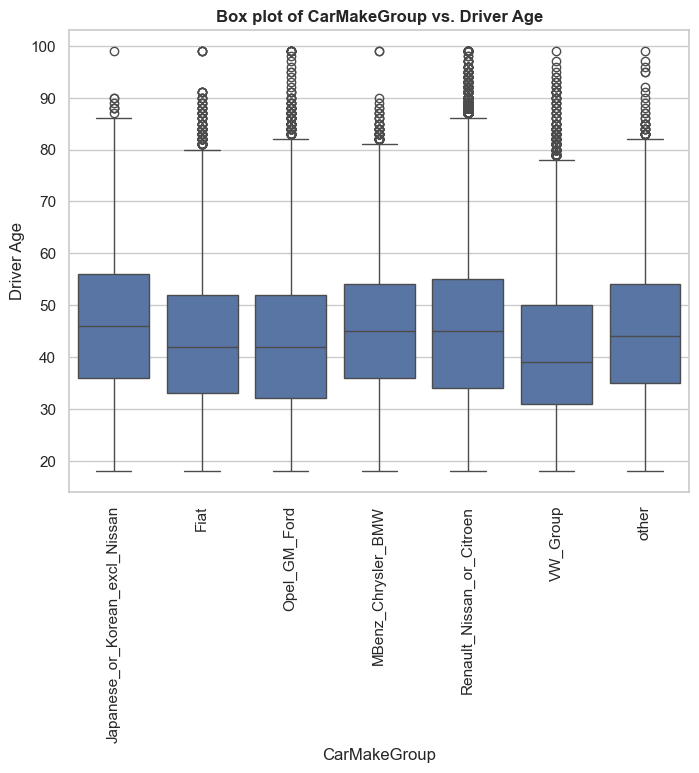

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CarMakeGroup', y='DriverAge', data=data)
plt.title('Box plot of CarMakeGroup vs. Driver Age', fontweight="bold")
plt.xlabel('CarMakeGroup')
plt.ylabel('Driver Age')
plt.xticks(rotation=90)
plt.show()

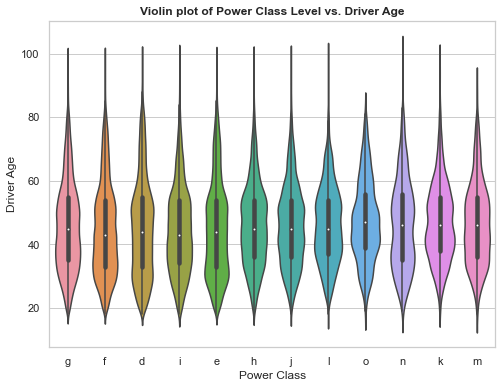

In [24]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='PowerClass', y='DriverAge', data=data)
plt.title('Violin plot of Power Class Level vs. Driver Age', fontweight="bold")
plt.xlabel('Power Class')
plt.ylabel('Driver Age')
plt.show()

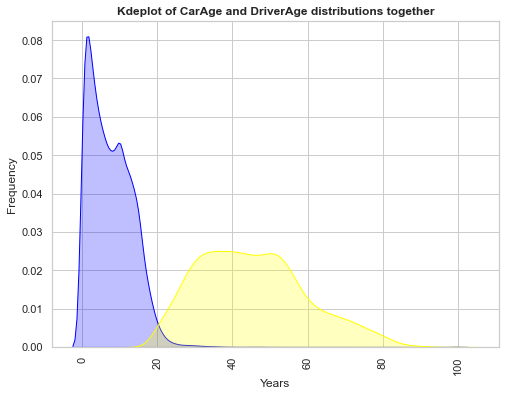

In [25]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x = data['CarAge'], fill=True, color="blue", bw_adjust=2)
sns.kdeplot(x = data['DriverAge'], fill=True, color="yellow", bw_adjust=2)
plt.title('Kdeplot of CarAge and DriverAge distributions together', fontweight="bold")
plt.xlabel('Years')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

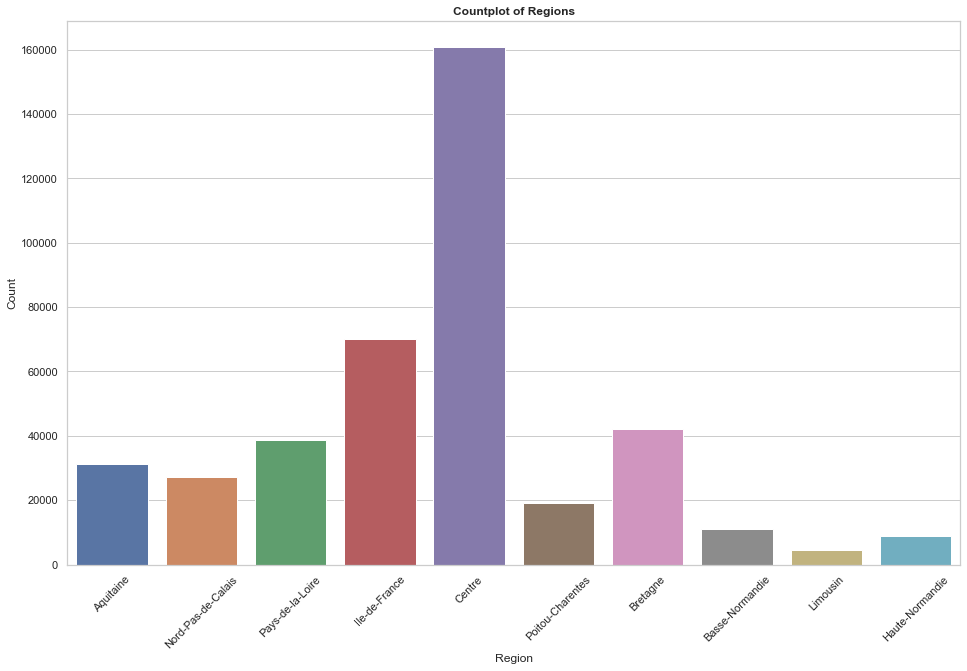

In [26]:
plt.figure(figsize=(16, 10))
sns.countplot(x='Region', data=data)
plt.title('Countplot of Regions', fontweight="bold")
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

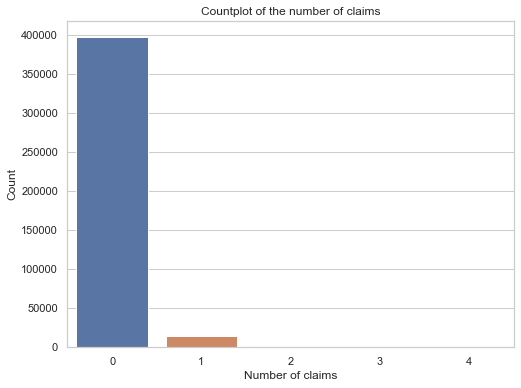

In [27]:
# Countplot of the number of claims
plt.figure(figsize=(8, 6))
sns.countplot(x='NumClaims', data=data)
plt.title('Countplot of the number of claims')
plt.xlabel('Number of claims')
plt.ylabel('Count')
plt.show()

In [28]:
# There are variables we would like to make categoricall, assigning numbers instead of letters
# in order to make our future analysis better

### Creating new features and encoding

#### We want to convert categorical variables (those that contain a finite set of distinct values or categories) into a numerical representation that machine learning algorithms can understand and process.

In [29]:
# We have 3 of those ("object" type)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413959 entries, 0 to 413959
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PolicyID        413959 non-null  int64  
 1   NumClaims       413959 non-null  int64  
 2   Exposure        413959 non-null  float64
 3   PowerClass      413959 non-null  object 
 4   CarAge          413959 non-null  int64  
 5   DriverAge       413959 non-null  int64  
 6   CarMakeGroup    413959 non-null  object 
 7   Fuel            413959 non-null  object 
 8   Region          413959 non-null  object 
 9   CityPopDensity  413959 non-null  int64  
 10  ClaimAmount     413959 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 54.0+ MB


In [30]:
data.columns

Index(['PolicyID', 'NumClaims', 'Exposure', 'PowerClass', 'CarAge',
       'DriverAge', 'CarMakeGroup', 'Fuel', 'Region', 'CityPopDensity',
       'ClaimAmount'],
      dtype='object')

In [31]:
# Summing up the data that is almost unique:
data_gr = data.groupby(['PolicyID', 'NumClaims', 'Exposure', 'PowerClass', 'CarAge','DriverAge', 'CarMakeGroup', 
                   'Fuel', 'Region', 'CityPopDensity'], as_index=False)['ClaimAmount'].sum()

In [32]:
data_gr.head()

,PolicyID,NumClaims,Exposure,PowerClass,CarAge,DriverAge,CarMakeGroup,Fuel,Region,CityPopDensity,ClaimAmount
0,1,0,0.09,g,0,46,Japanese_or_Korean_excl_Nissan,Diesel,Aquitaine,76,0.0
1,2,0,0.84,g,0,46,Japanese_or_Korean_excl_Nissan,Diesel,Aquitaine,76,0.0
2,3,0,0.52,f,2,38,Japanese_or_Korean_excl_Nissan,Regular,Nord-Pas-de-Calais,3003,0.0
3,4,0,0.45,f,2,38,Japanese_or_Korean_excl_Nissan,Regular,Nord-Pas-de-Calais,3003,0.0
4,5,0,0.15,g,0,41,Japanese_or_Korean_excl_Nissan,Diesel,Pays-de-la-Loire,60,0.0


In [33]:
data_gr.shape

(413169, 11)

In [34]:
duplicates_no = data_gr.drop("ClaimAmount", axis = 1).duplicated()
print(f"Number of duplicates on columns except ClaimAmount: {duplicates_no.sum()}")

Number of duplicates on columns except ClaimAmount: 0


In [35]:
# converting categorical columns to numeric
data_to_convert = data_gr[['CarMakeGroup', 'Fuel', 'Region']]

In [36]:
data_enc = pd.get_dummies(data_gr, columns=data_to_convert.columns)
data_enc[data_enc.select_dtypes(include='bool').columns] = data_enc.select_dtypes(include='bool'
                                                                                       ).astype(int)
data_enc.head()

,PolicyID,NumClaims,Exposure,PowerClass,CarAge,DriverAge,CityPopDensity,ClaimAmount,CarMakeGroup_Fiat,CarMakeGroup_Japanese_or_Korean_excl_Nissan,...,Region_Aquitaine,Region_Basse-Normandie,Region_Bretagne,Region_Centre,Region_Haute-Normandie,Region_Ile-de-France,Region_Limousin,Region_Nord-Pas-de-Calais,Region_Pays-de-la-Loire,Region_Poitou-Charentes
0,1,0,0.09,g,0,46,76,0.0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0.84,g,0,46,76,0.0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,3,0,0.52,f,2,38,3003,0.0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0.45,f,2,38,3003,0.0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,5,0,0.15,g,0,41,60,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [37]:
# PowerClass -> it's best to make it numerical as well for future use

In [38]:
data_enc['PowerClass'].unique()

array(['g', 'f', 'd', 'i', 'e', 'h', 'j', 'l', 'o', 'n', 'k', 'm'],
      dtype=object)

In [39]:
data_enc['PowerClass'] = data_enc['PowerClass'].map({'g': 0, 'f': 1, 'd': 2, 'i': 3, 'e': 4, 'h': 5, 
                                         'j': 6, 'l': 7, 'o': 8, 'n': 9, 'k': 10, 'm': 11})

In [40]:
# Our results
data_enc['PowerClass'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [41]:
data = data_enc

In [42]:
# Our final data looks as follows
data.head()

,PolicyID,NumClaims,Exposure,PowerClass,CarAge,DriverAge,CityPopDensity,ClaimAmount,CarMakeGroup_Fiat,CarMakeGroup_Japanese_or_Korean_excl_Nissan,...,Region_Aquitaine,Region_Basse-Normandie,Region_Bretagne,Region_Centre,Region_Haute-Normandie,Region_Ile-de-France,Region_Limousin,Region_Nord-Pas-de-Calais,Region_Pays-de-la-Loire,Region_Poitou-Charentes
0,1,0,0.09,0,0,46,76,0.0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0.84,0,0,46,76,0.0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,3,0,0.52,1,2,38,3003,0.0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0.45,1,2,38,3003,0.0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,5,0,0.15,0,0,41,60,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Building the Segmentation Model

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score

In [44]:
# Data Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(data)

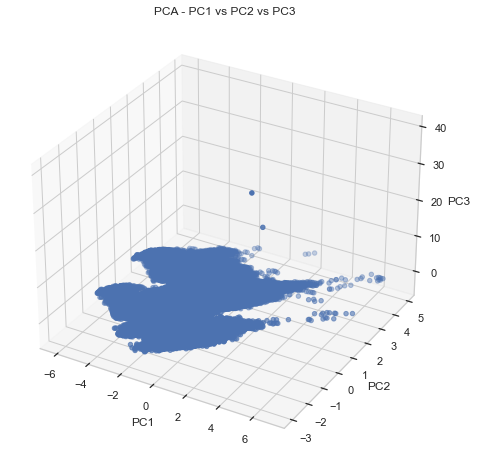

In [45]:
# PCA Application
n_components = 3
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_standardized)

# Create DataFrame for Principal Components
pca_columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=principal_components, columns=pca_columns)

# 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])
ax.set_title('PCA - PC1 vs PC2 vs PC3')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

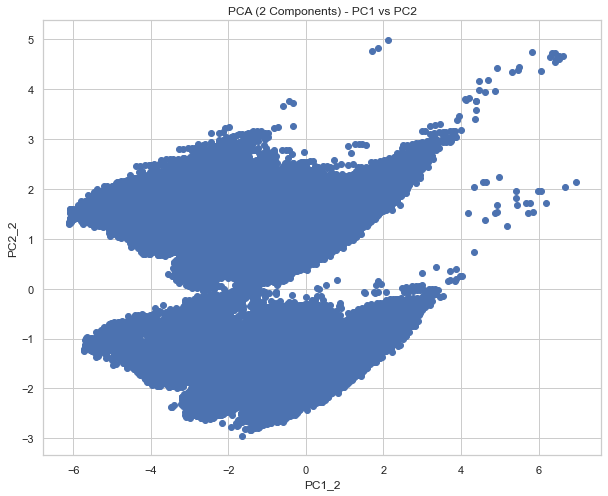

In [46]:
# PCA Application with 2 components (unique variables)
n_components_2 = 2
pca_2 = PCA(n_components=n_components_2)
principal_components_2 = pca_2.fit_transform(X_standardized)

# Create DataFrame for Principal Components (2D)
pca_columns_2 = [f'PC{i+1}_2' for i in range(n_components_2)]
df_pca_2 = pd.DataFrame(data=principal_components_2, columns=pca_columns_2)

# 2D Visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_pca_2['PC1_2'], df_pca_2['PC2_2'])
plt.title('PCA (2 Components) - PC1 vs PC2')
plt.xlabel('PC1_2')
plt.ylabel('PC2_2')
plt.grid(True)
plt.show()


## Elbow

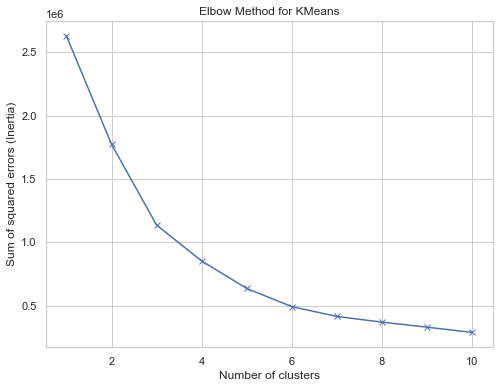

In [47]:
# Elbow Method for Optimal Clusters
def plot_elbow(X, max_clusters=10):
    distortions = []
    K = range(1, max_clusters + 1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared errors (Inertia)')
    plt.title('Elbow Method for KMeans')
    plt.show()

plot_elbow(df_pca)

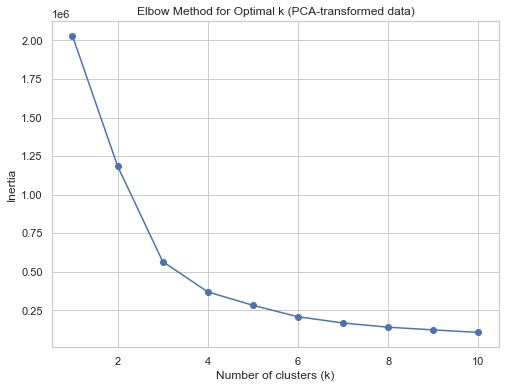

In [48]:
# Диапазон значений для количества кластеров
k_range = range(1, 11)
inertia_values = []

# Вычисляем KMeans для каждого количества кластеров и сохраняем значение inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_2)  # Используем PCA-преобразованные данные
    inertia_values.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA-transformed data)')
plt.grid(True)
plt.show()

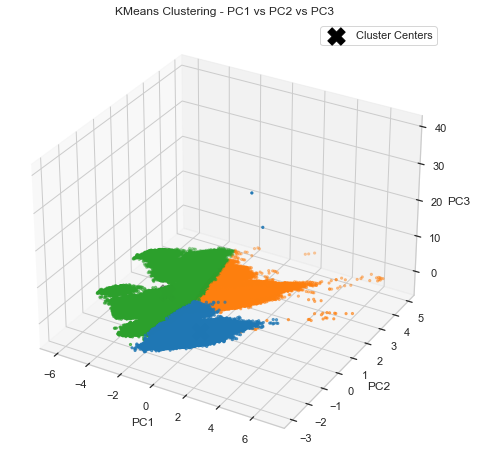

In [49]:
# Perform KMeans Clustering with Optimal Number of Clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

# 3D Scatter Plot with Cluster Colors
colors = {i: plt.cm.tab10(i) for i in range(optimal_k)}

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], 
           c=[colors[label] for label in df_pca['Cluster']], s=5)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           c='black', s=300, marker='X', label='Cluster Centers')
ax.set_title('KMeans Clustering - PC1 vs PC2 vs PC3')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(loc='upper right')
plt.show()

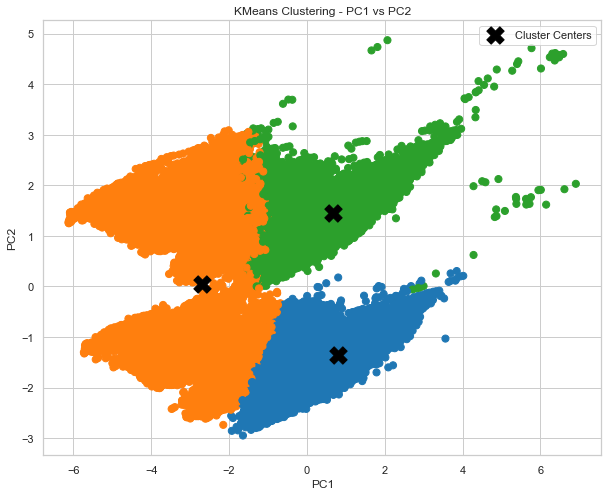

In [50]:
optimal_k= 3
# Fit KMeans to your data (assuming df_pca has your PCA-transformed data)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)  # optimal_k is the value you found with the elbow method
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

# Assign colors for each cluster
colors = {i: plt.cm.tab10(i) for i in range(optimal_k)}  # Use a color map for different clusters

# Create a 2D scatter plot for PC1 and PC2
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot using the cluster labels
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], 
                     c=[colors[label] for label in df_pca['Cluster']], s=50)

# Display cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='black', s=300, marker='X', label='Cluster Centers')

ax.set_title('KMeans Clustering - PC1 vs PC2')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(loc='upper right')

# Show the plot
plt.show()

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ssd_silhouette = []
silhouette_scores = []

K = range(2, 4)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    ssd_silhouette.append(model.inertia_)
    silhouette_s = silhouette_score(data, model.labels_)
    silhouette_scores.append(silhouette_s)
    print(f'Silhouette Score for {k} clusters: {silhouette_s}')


Silhouette Score for 2 clusters: 0.6242037010991395
Silhouette Score for 3 clusters: 0.5852762816114951


In [55]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin scores for a range of cluster numbers
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    db_score = davies_bouldin_score(data, labels)
    db_scores.append(db_score)
    

# Find the number of clusters with the lowest Davies-Bouldin score
optimal_k_db = np.argmin(db_scores) + 2 
optimal_db_score = db_scores[np.argmin(db_scores)]

# Print optimal number of clusters and corresponding Davies-Bouldin score
print(f'Optimal number of clusters using Davies-Bouldin: {optimal_k_db}, Score: {optimal_db_score}')

Optimal number of clusters using Davies-Bouldin: 2, Score: 0.5034032359423155


In [61]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[selected_features])
# Homogeneity Score Calculation
labels_true = np.digitize(data['ClaimAmount'], bins=np.arange(0, max(data['ClaimAmount']) + 1))
homogeneity_scores = []

for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    homogeneity = homogeneity_score(labels_true, labels)
    homogeneity_scores.append((n_clusters, homogeneity))
    print(f"Homogeneity for {n_clusters} clusters: {homogeneity:.3f}")

Homogeneity for 2 clusters: 0.368
Homogeneity for 3 clusters: 0.368
Homogeneity for 4 clusters: 0.362
Homogeneity for 5 clusters: 0.362


In [57]:
# K-means with 3 clusters
optimal_k = 3
#K-means++ is used to ensure better initial cluster centers.
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

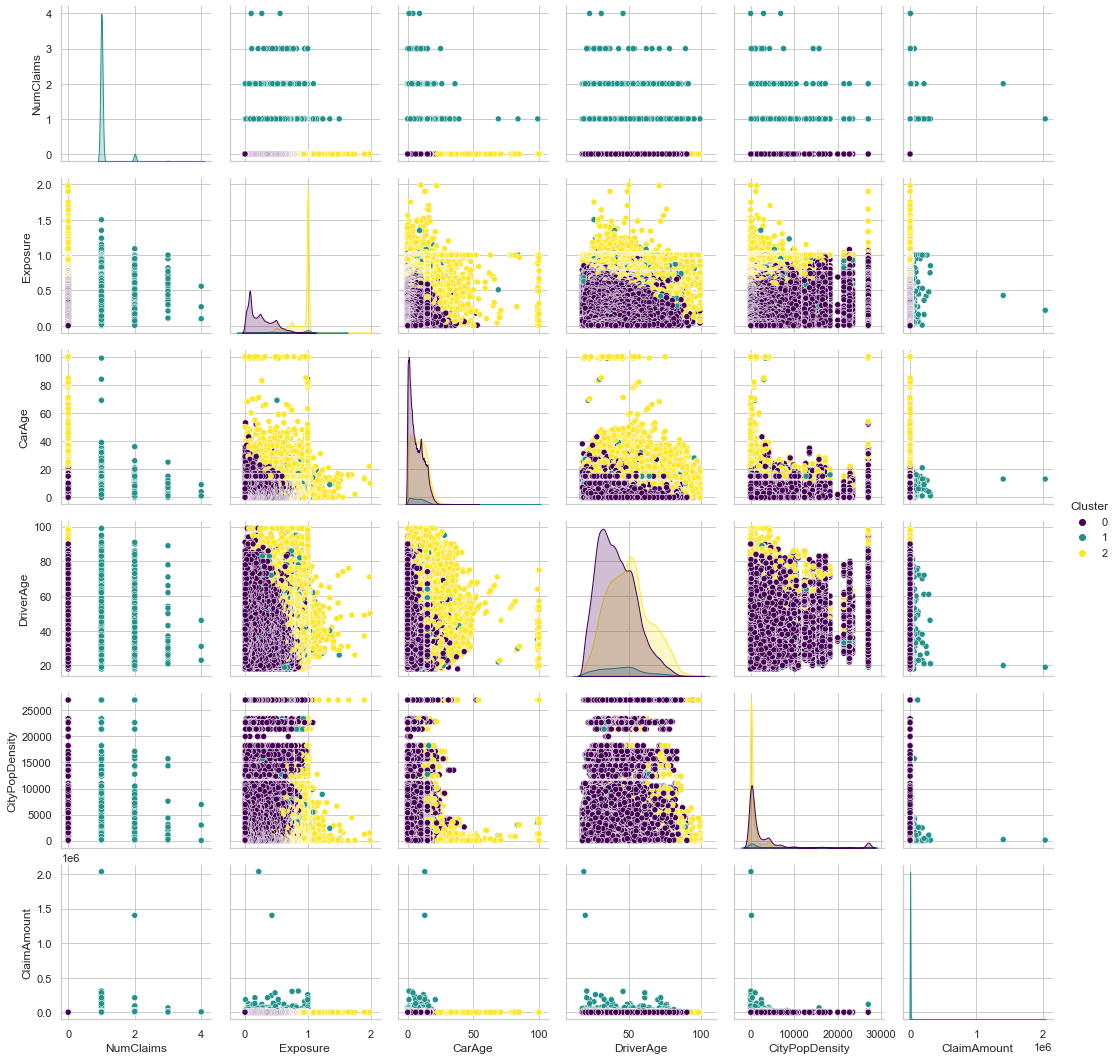


Cluster Statistics:
          NumClaims  Exposure    CarAge  DriverAge  CityPopDensity  ClaimAmount
Cluster                                                                       
0         0.000000  0.253056  6.309120  41.466171     2927.126105      0.00000
1         1.051397  0.707456  7.700715  44.905718     2061.834698   2239.37024
2         0.000000  0.896154  8.897030  49.696561      917.368778      0.00000


In [58]:
# Plotting pairplot with clusters
sns.pairplot(data[selected_features + ['Cluster']], hue='Cluster', palette='viridis')
plt.show()

# Descriptive statistics for each cluster
cluster_stats = data.groupby('Cluster')[selected_features].mean()
print("\nCluster Statistics:\n", cluster_stats)

In [59]:
# K-means with 3 clusters
optimal_k = 4
#K-means++ is used to ensure better initial cluster centers.
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

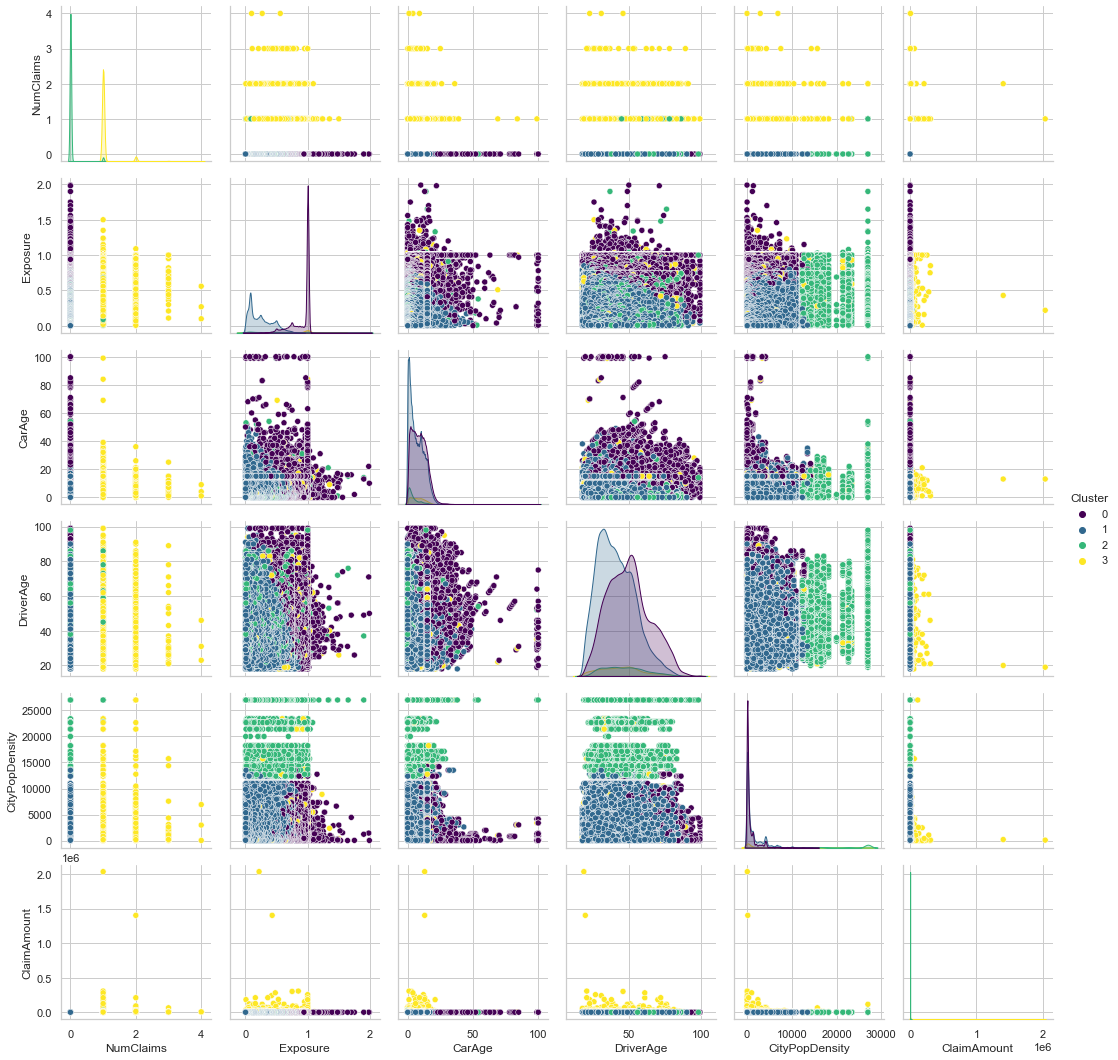


Cluster Statistics:
          NumClaims  Exposure    CarAge  DriverAge  CityPopDensity  ClaimAmount
Cluster                                                                       
0         0.000000  0.902989  8.791031  49.783021      779.706750     0.000000
1         0.000000  0.247098  6.613443  41.172626     1452.847236     0.000000
2         0.025127  0.458633  4.364145  46.960943    23787.680445    31.264223
3         1.052719  0.709081  7.768395  44.849640     1420.782391  2264.971141


In [60]:
# Plotting pairplot with clusters
sns.pairplot(data[selected_features + ['Cluster']], hue='Cluster', palette='viridis')
plt.show()

# Descriptive statistics for each cluster
cluster_stats = data.groupby('Cluster')[selected_features].mean()
print("\nCluster Statistics:\n", cluster_stats)